<a href="https://colab.research.google.com/github/AvishekDataScience/Bharat-Intern/blob/branch-1/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Titanic Classification



##### **Project Type**    - Classification
##### **Industry**    - Bharat Intern
##### **Contribution**    - Individual
##### **Team Member 1** -**Avishek Patra**


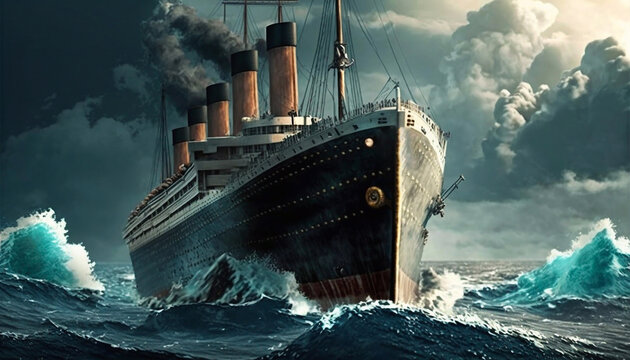

# **Problem Statement**


In this data science project, we aim to build a predictive system to determine whether a person would have survived the sinking of the RMS Titanic. Using a dataset containing passenger information, including socio-economic status, age, gender, and survival outcomes, we will preprocess the data and select relevant features.

Our goal is to train machine learning models to accurately classify passengers as survivors or non-survivors. By evaluating the models' performance, we intend to uncover the most critical factors that likely contributed to the passengers' survival during this historic disaster.

The project seeks to provide valuable insights into the impact of socio-economic status, age, gender, and other attributes on the likelihood of surviving the Titanic sinking, contributing to a deeper understanding of this tragic event.

# **Algorithm Used**

1 : Logistic Regression

2 : Random Forest

3 : Support Vector Machine (SVM)

4 : K-Nearest Neighbors (KNN)

5 : Gradient Boosting

6 : Decision Trees

# ***Let's Begin***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Titanic Data csv file
df = pd.read_csv("/content/drive/MyDrive/Intern_Projects/Bharat-Intern/titanic.csv")

### Dataset First View

In [4]:
# Dataset first look from top 5 columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Dataset first look from buttom five columns
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Duplicate Values

In [7]:
# Dataset duplicate values count
duplicated_values_count = len(df[df.duplicated()])
print("Number of duplicated values :" , duplicated_values_count)

Number of duplicated values : 0


#### Missing & Null Values

In [8]:
# Missing values/null values count
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Total null values
df.isnull().sum().sum()

866

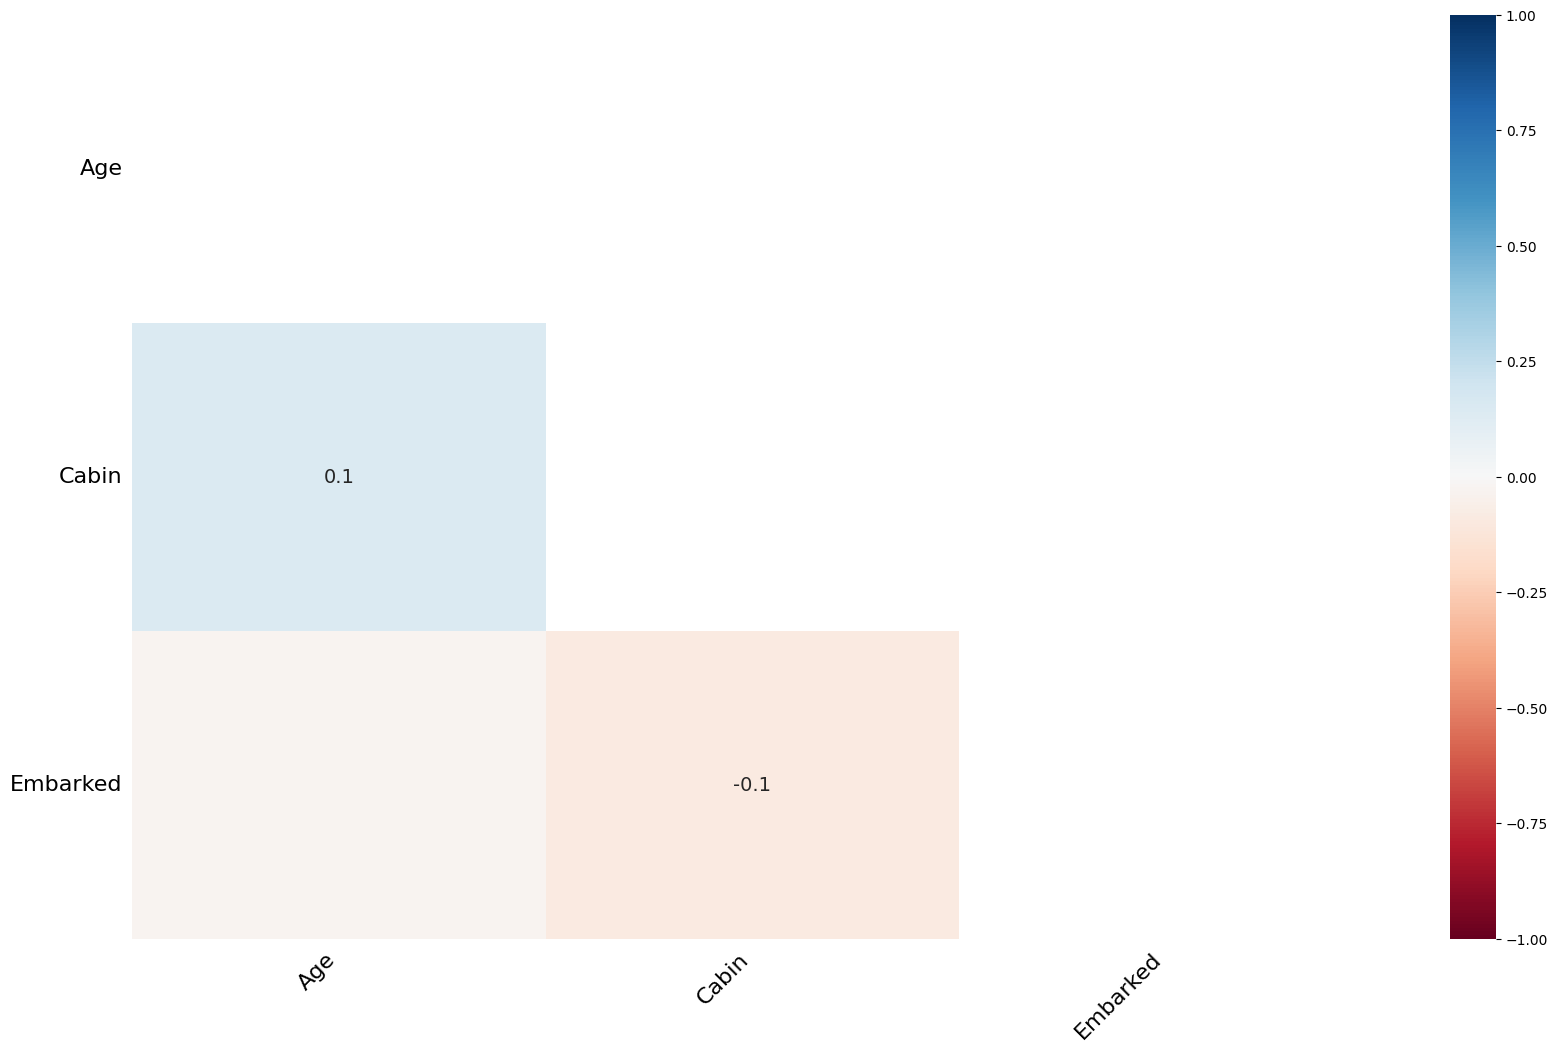

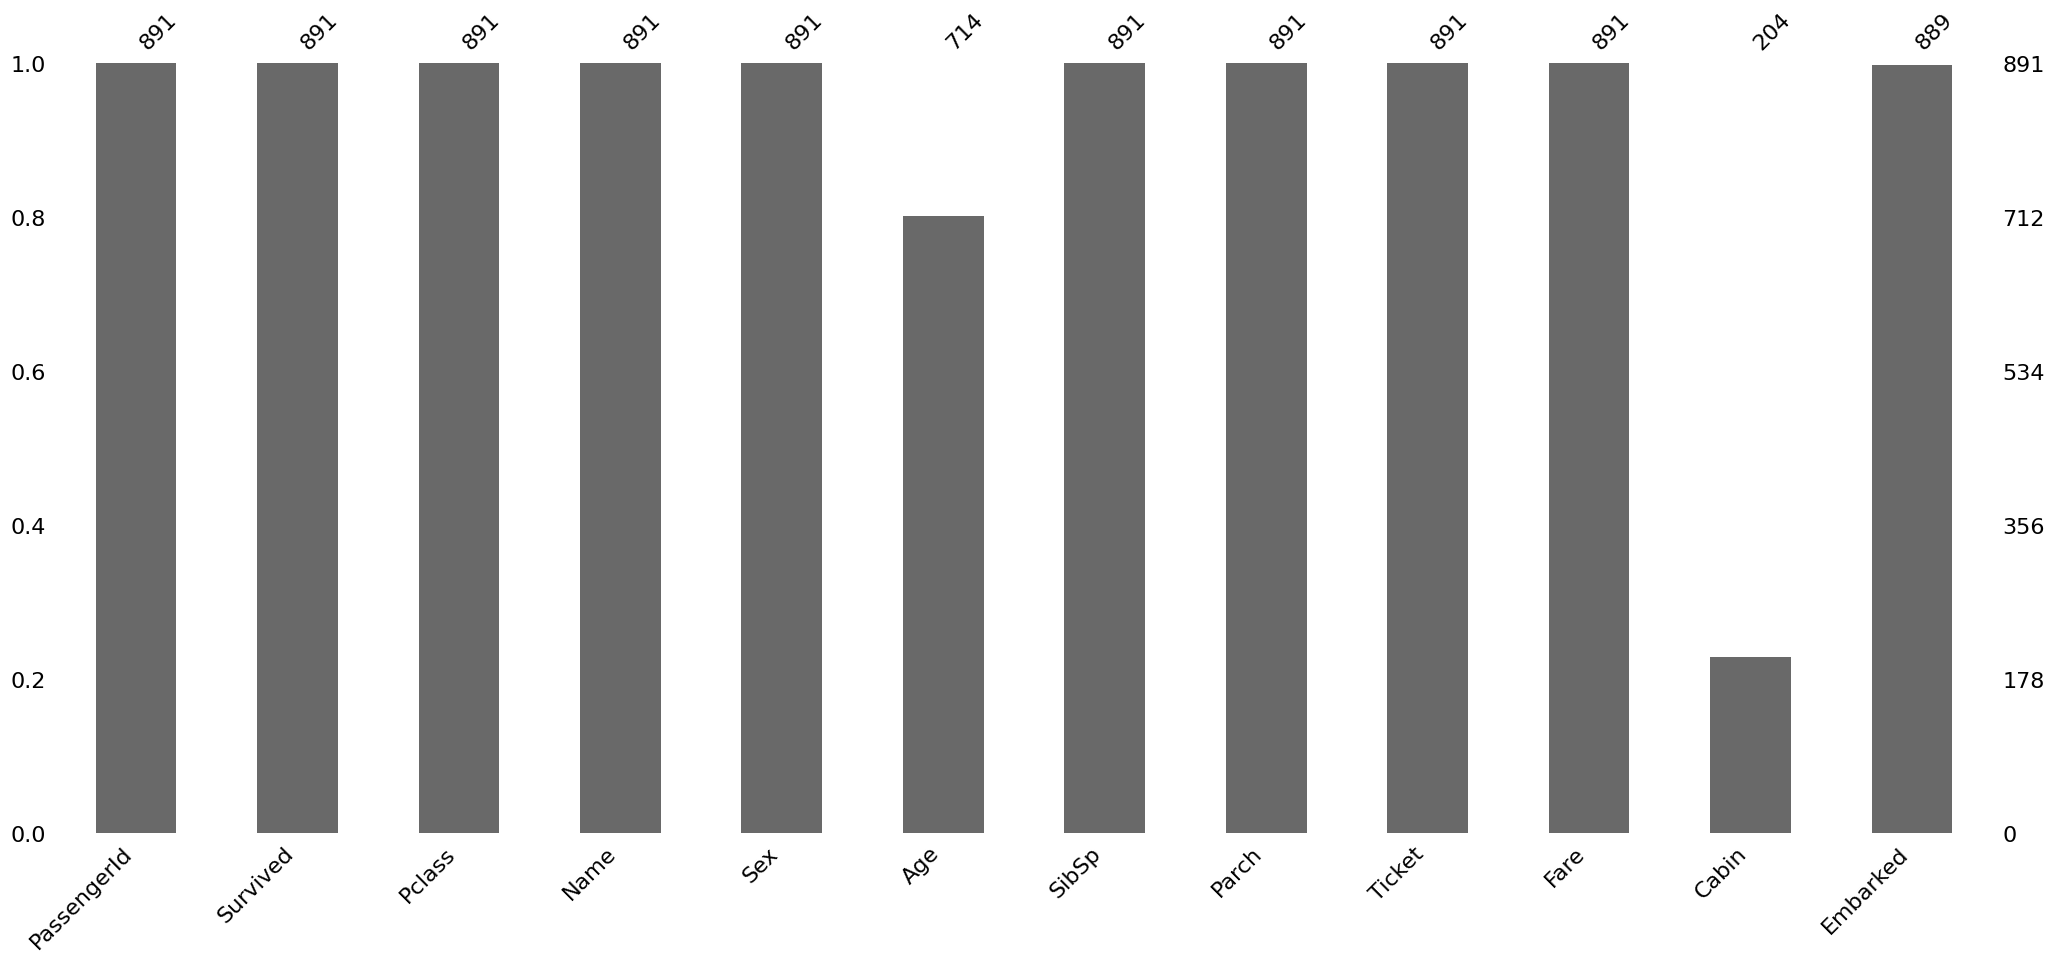

In [10]:
# Visualizing the missing values
# visualize missing data with a heatmap
import missingno as msno
msno.heatmap(df)
plt.show()

# visualize missing data with a bar chart
msno.bar(df)
plt.show()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Column
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. ***Data Wrangling***

In [12]:
# Handling null values
df.drop('Cabin', axis=1,inplace=True)

In [13]:
df.dropna(inplace= True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now There is no missing values in our data set

## ***New Set of Data***

In [15]:
df.shape

(712, 11)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
# Checking Unique Values
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
# Convert categorical column into numerical column using hot map
new_df = pd.get_dummies(df,columns=['Sex','Embarked'])

In [19]:
# New data after encoding
new_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [20]:
# Drop unnecesery columns
new_df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

In [21]:
# Unique values from Age
import sys
sys.setrecursionlimit(5000000)
age_unique=[new_df['Age'].unique()]
age_unique

[array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
        58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
        19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
        29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
        25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
        37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
        55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
        20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
        10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
        24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])]

There is some discrepency

In [22]:
# Roundingoff values in Age
def age_roundoff(age):
  x = round(age)
  return x

In [23]:
# Apply lamda funtion to modify values
new_df['Age'] = new_df['Age'].apply(lambda age:age_roundoff(age))

In [24]:
# now check new data type
new_df['Age'].dtypes

dtype('int64')

In [25]:
# Modified Unique Values
new_df['Age'].unique()

array([22, 38, 26, 35, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15, 28,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  1, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       56, 44, 61, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57, 80,
        6,  0, 74])

Now There is no Discrepency after modification

## **New Data Ready for Model Building**

In [26]:
new_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1


## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - **1.Passengers**

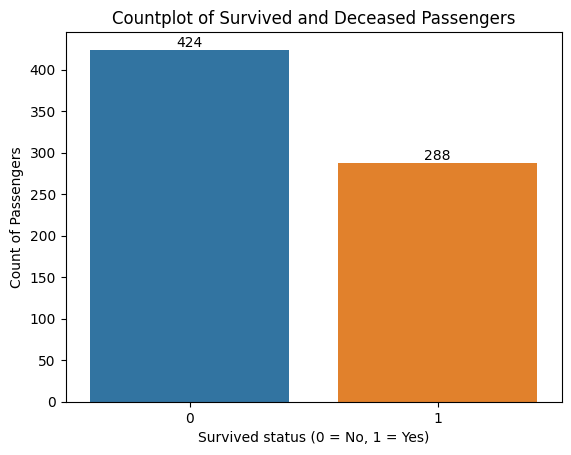

In [27]:
# Survival status of passengers
# Assuming you have a DataFrame named new_df containing the relevant data
a = new_df.groupby('Survived', as_index=False)['Age'].count()

# Creating the countplot
ax = sns.barplot(data=a, x='Survived', y='Age')

# Adding labels and title to the plot
plt.title('Countplot of Survived and Deceased Passengers')
plt.xlabel('Survived status (0 = No, 1 = Yes)')
plt.ylabel('Count of Passengers')

# Adding count labels above the bars
for i in ax.containers:
    ax.bar_label(i)

# Display the plot
plt.show()


## Countplot of Passenger gerder wise

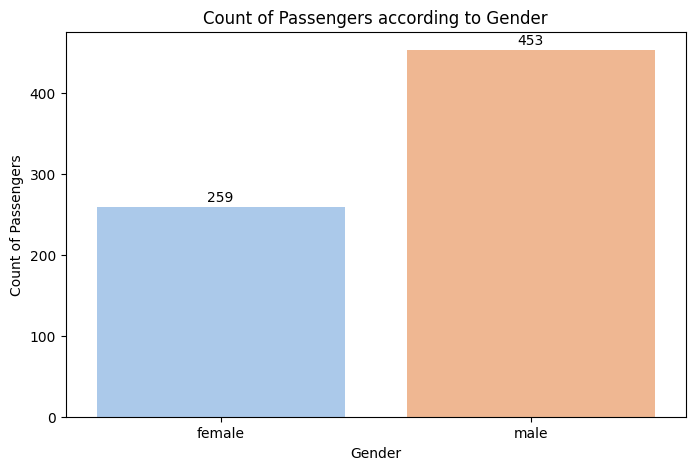

In [28]:
b = df.groupby(['Sex'], as_index=False)['Age'].count()

plt.figure(figsize=(8, 5))
bx = sns.barplot(data=b, y='Age', x='Sex', palette='pastel')

for i in bx.containers:
    bx.bar_label(i, label_type='edge', fontsize=10, padding=2)

plt.title('Count of Passengers according to Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Passengers')
plt.show()


#### Chart - **2. AGE**

## *Distribution plot for Age*

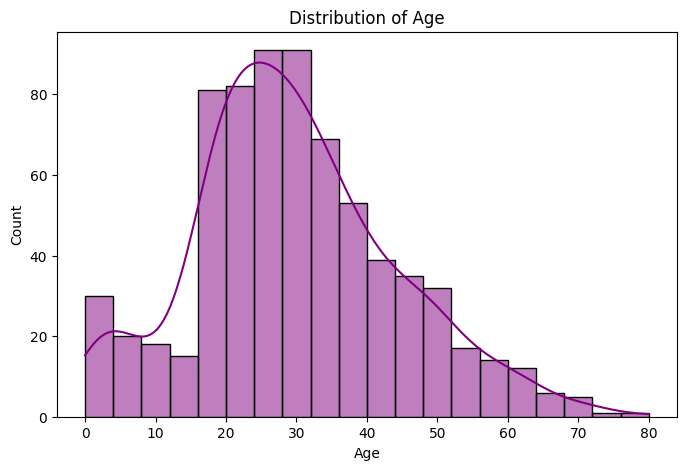

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(new_df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#### Chart - **3. Pair plot for multiple variable relationships**

<Figure size 1000x800 with 0 Axes>

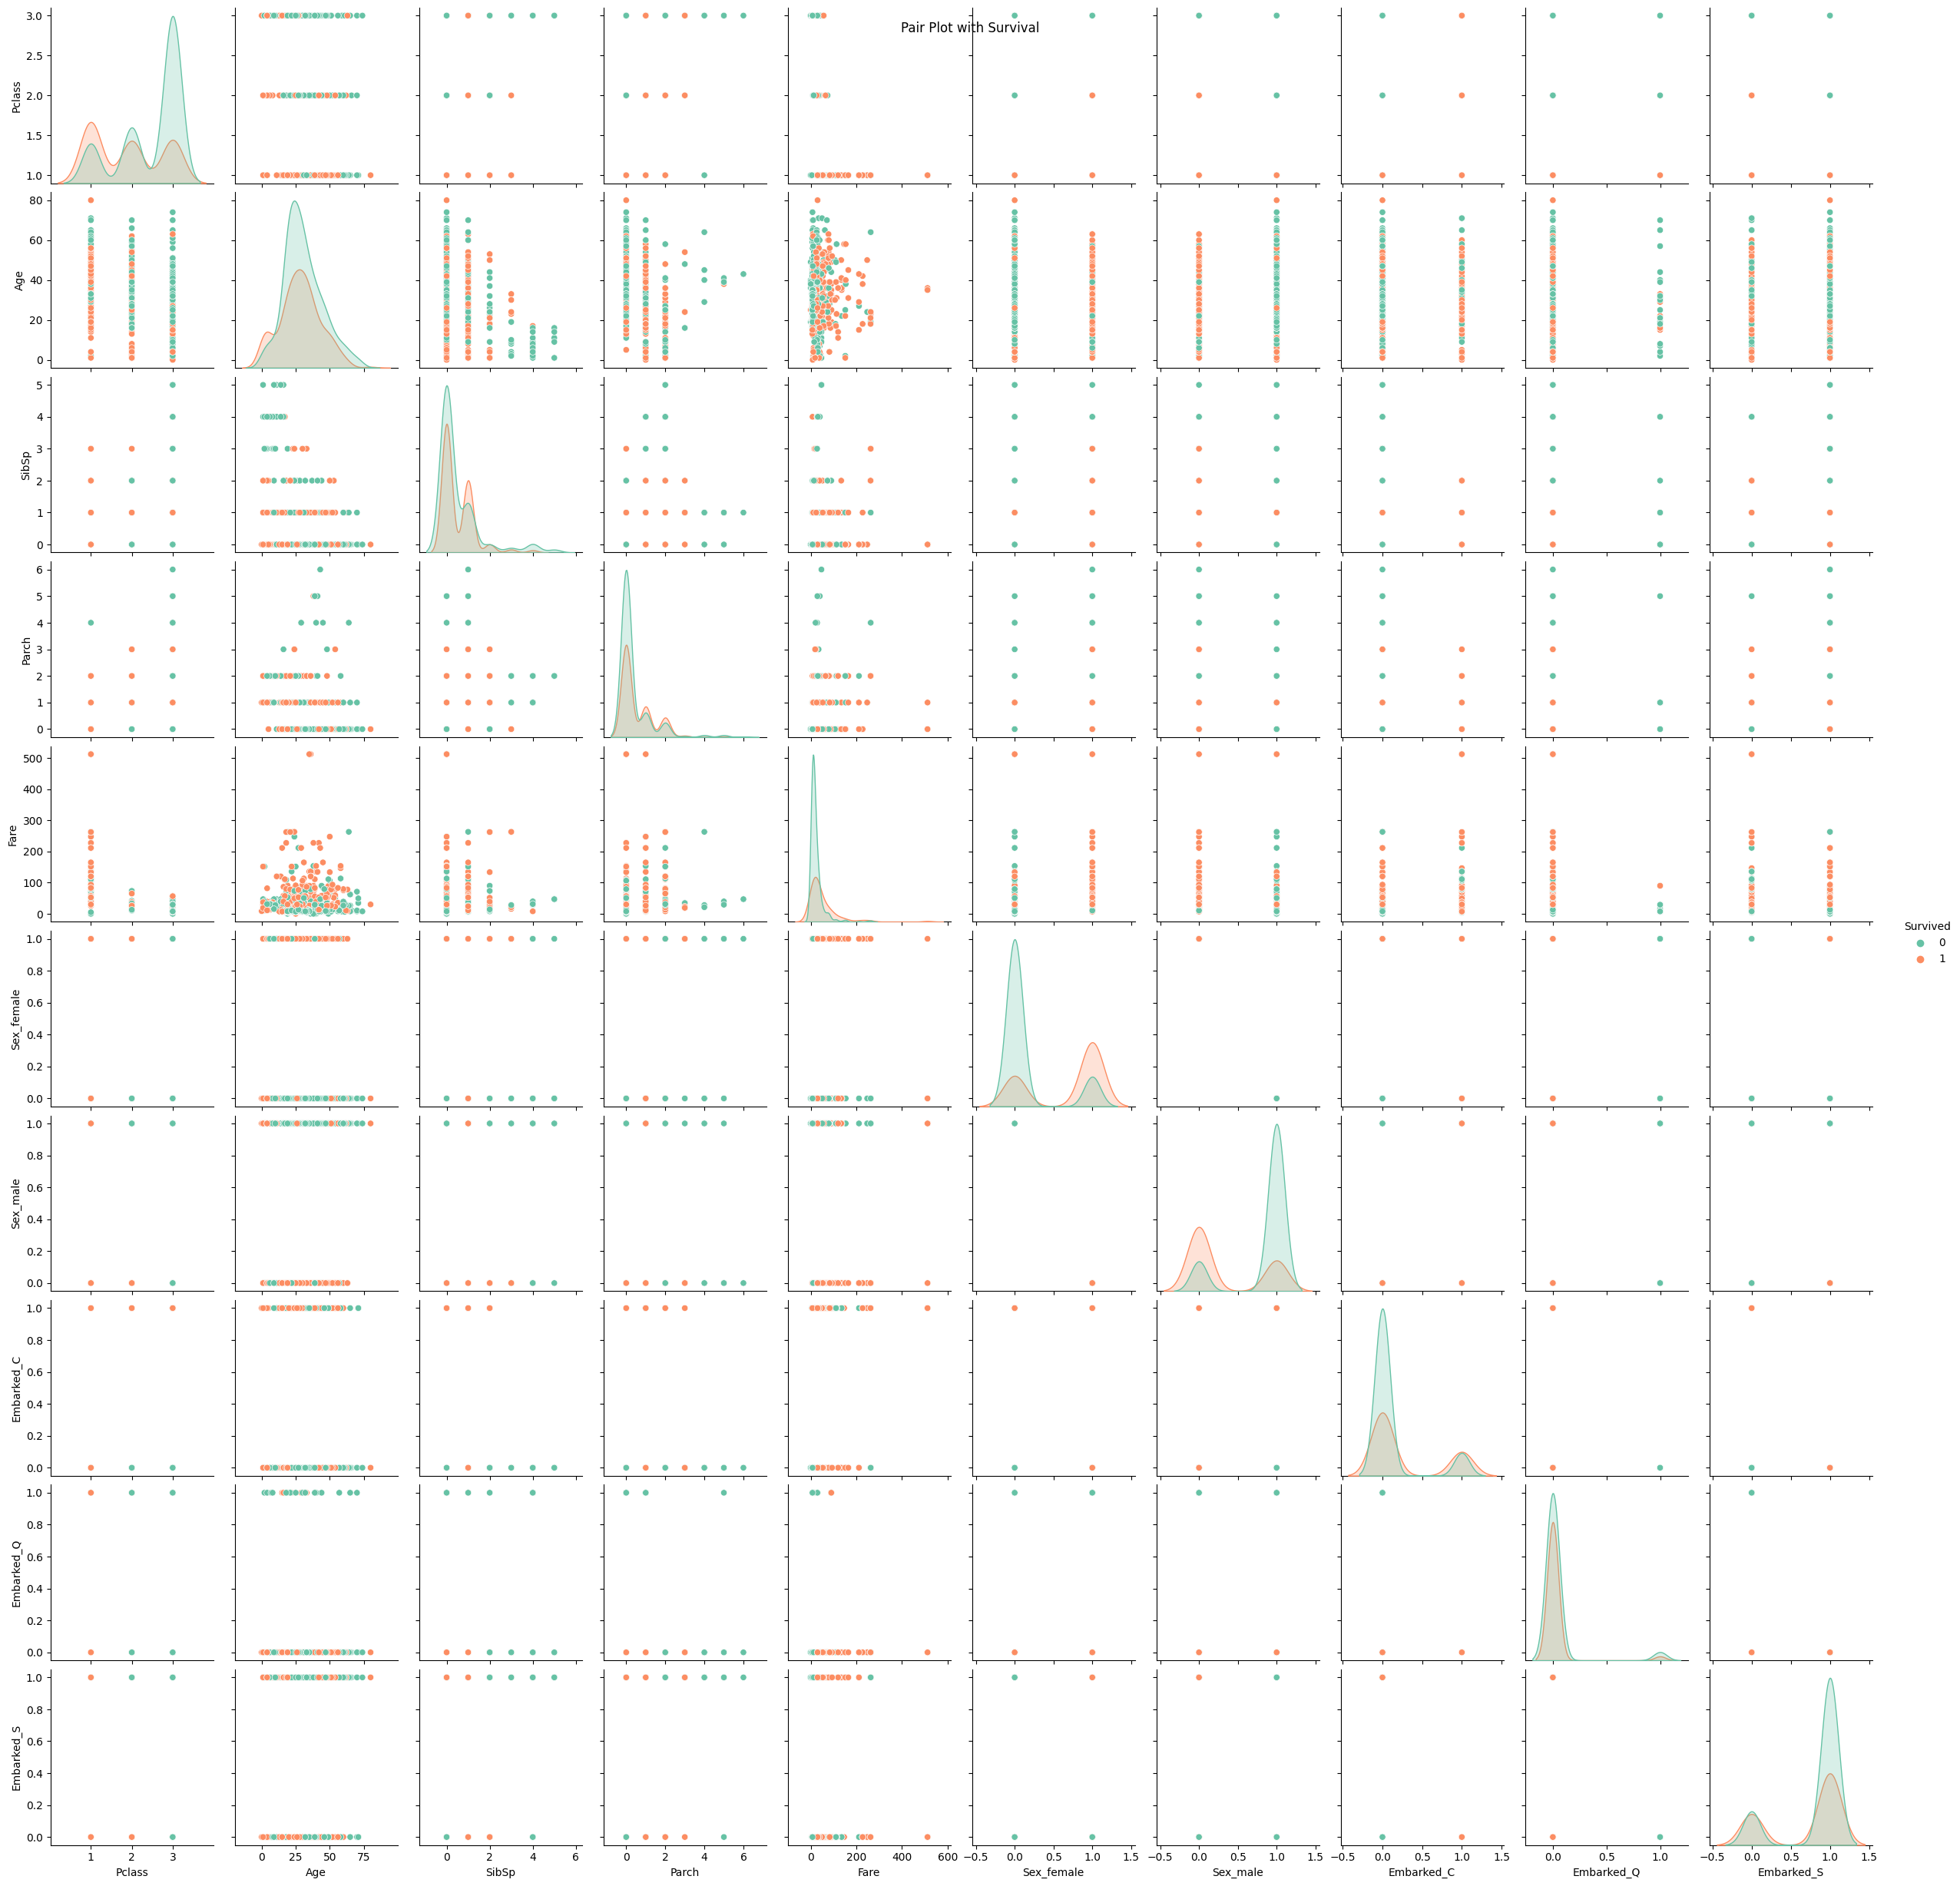

In [30]:
plt.figure(figsize=(10, 8))
sns.pairplot(new_df, hue='Survived', diag_kind='kde', palette='Set2')
plt.suptitle('Pair Plot with Survival')
plt.show()


#### Chart - **4. Violin plot for Age Distribution by Passenger Class and Survival Status**

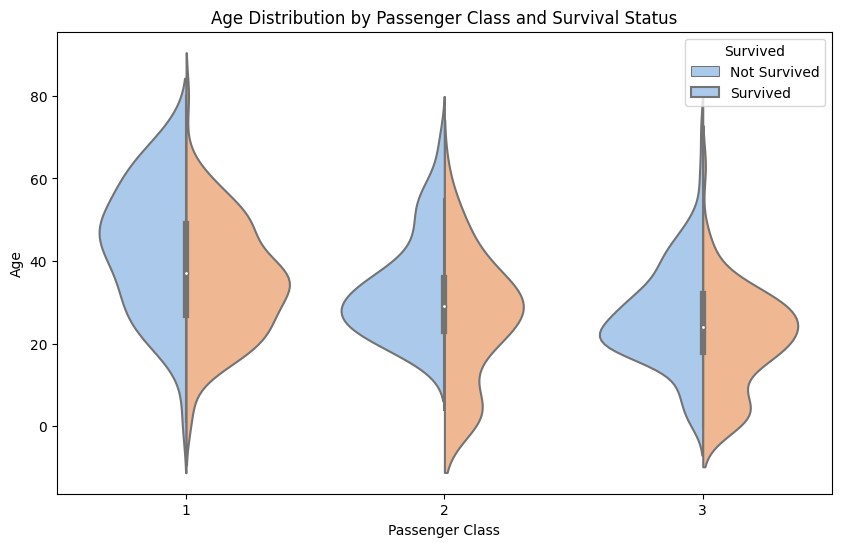

In [31]:
# Violin plot for Age Distribution by Passenger Class and Survival Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=new_df, split=True, palette='pastel')
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()


#### Chart - **5. HeatMap**

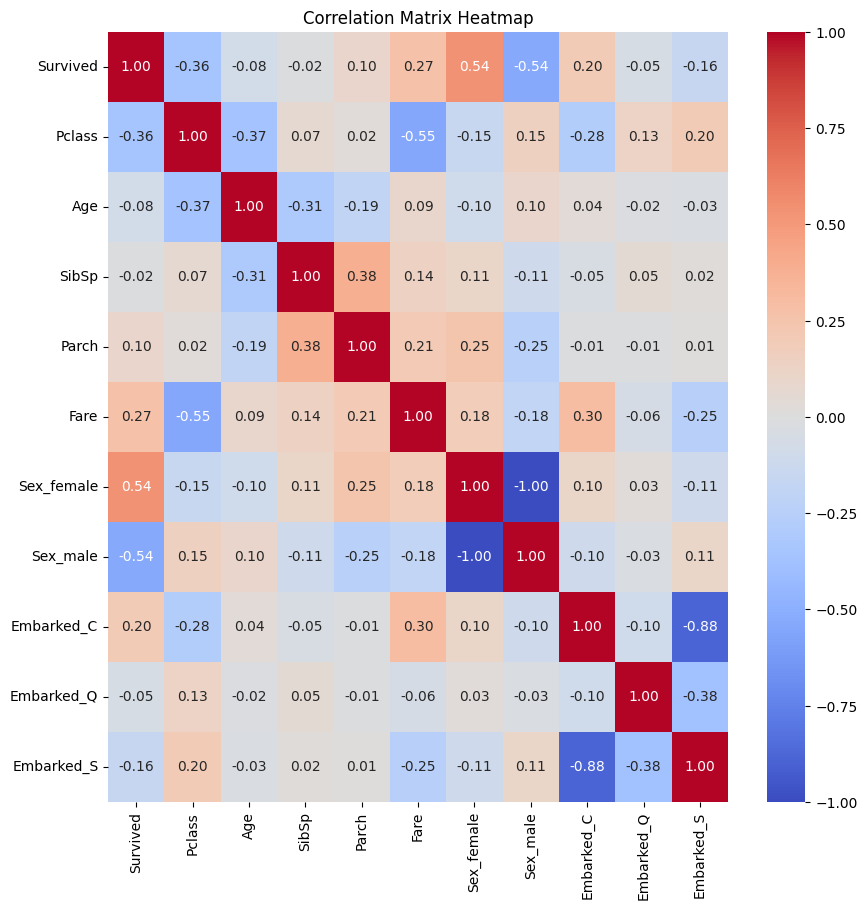

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

#Feature Engineering & Data Pre-processing

In [33]:
from sklearn.model_selection import train_test_split

# Extracting features (X) and target (y) from the DataFrame
X = new_df.iloc[:, 1:]  # Independent variables (all columns except the first column)
y = new_df.iloc[:, 0]   # Dependent variable (the first column)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Display the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (569, 10)
X_test shape: (143, 10)
y_train shape: (569,)
y_test shape: (143,)


## Data Balance

In [34]:
from collections import Counter

# Count the class distribution before balancing
counter_before = Counter(y_train)
print(f'Before balancing: {counter_before}')


Before balancing: Counter({0: 341, 1: 228})


It's showing data is not balanced

In [35]:
# Data balancing using SMOTE Technique
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

# Count the class distribution after balancing
counter_after = Counter(y_train_balanced)
print(f'After balancing: {counter_after}')


After balancing: Counter({1: 341, 0: 341})


Data is balanced now and ready for model building now

# ML Model Implementation

## Dicision Tree Classifier ( Withot hyperparameter tuning ):-

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Fitting data to the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

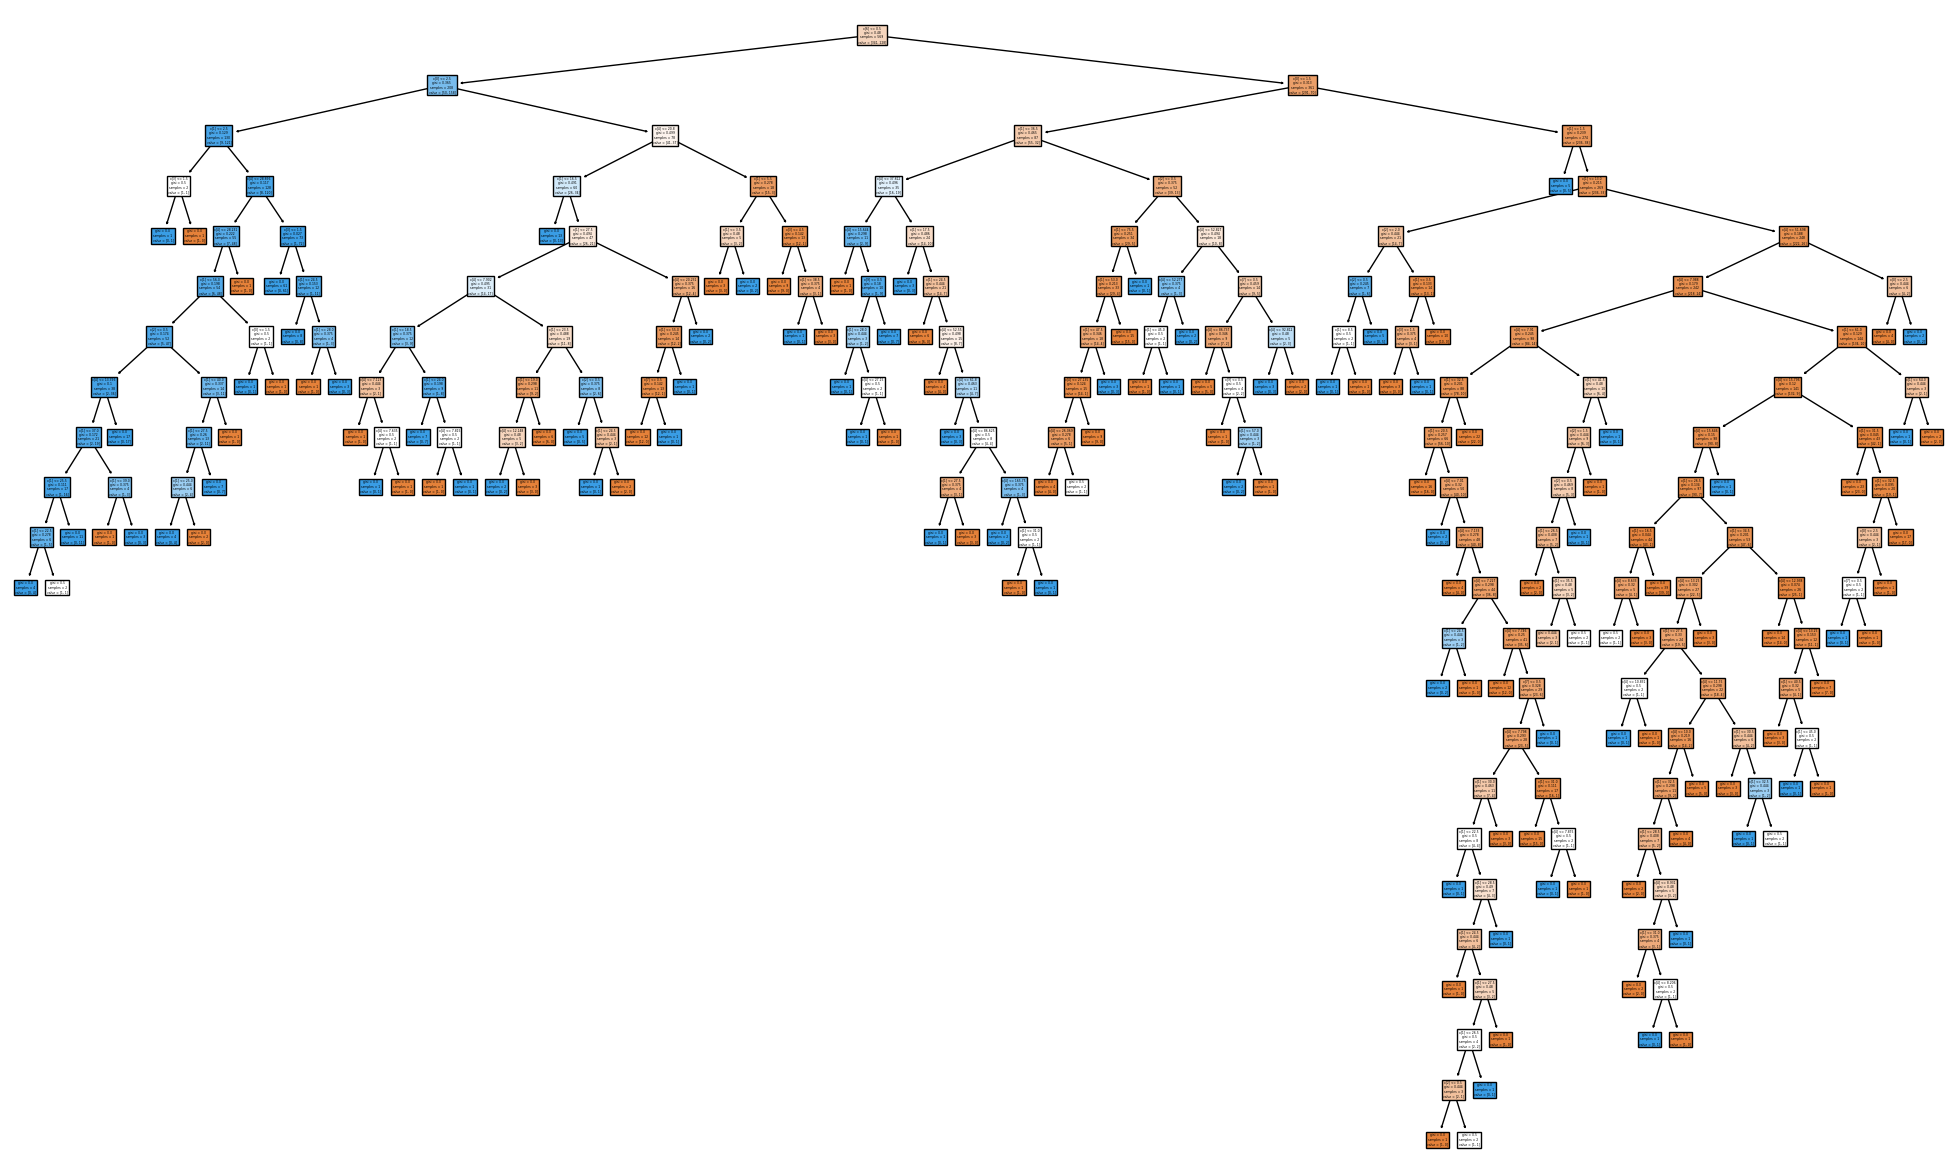

In [37]:
# Plotting the decision tree
from sklearn import tree
plt.figure(figsize=(25, 15))
tree.plot_tree(classifier, filled=True)
plt.show()

In [38]:
# Predicting the values for training data
y_train_pred = classifier.predict(X_train)

# Calculating the accuracy score for the training data
score_train = accuracy_score(y_train, y_train_pred)
print(f'The accuracy score for the training data is {score_train}')

# Classification report for the training data
print(classification_report(y_train, y_train_pred))

The accuracy score for the training data is 0.9876977152899824
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       341
           1       1.00      0.97      0.98       228

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.99       569
weighted avg       0.99      0.99      0.99       569



In [39]:
# Predictiong for test data
y_test_pred = classifier.predict(X_test)

# Accurecy score for the test data
score_test = accuracy_score(y_test, y_test_pred)
print(f'The accurecy score for the test data is {score_test}')

The accurecy score for the test data is 0.7342657342657343


## Decision tree classifier with hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# Declaring the parameters
parameters={'criterion':['gini', 'entropy', 'log_loss'],
            'splitter':['best', 'random'],
            'min_samples_split': [0,1,2,3,5,7,9,10],
            'max_depth':[1,2,3,4,5,6,7,8,9,10,12,15],
            'min_samples_leaf':[0,1,2,3,4,5,6,7,8,9,10,12,15],
            'max_features':['auto', 'sqrt', 'log2']}


In [41]:
# Initialize GridSearchCV for hyperparameter tuning
dtcv=GridSearchCV(classifier,parameters,cv=5,scoring='accuracy')

In [42]:
# Fitting data in model
dtcv.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              12, 15],
                         'min_samples_split': [0, 1, 2, 3, 5, 7, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [43]:
# Best parameters chosen by GridSearchCV
best_params = dtcv.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'}


In [44]:
# Best score achieved during GridSearchCV
best_score = dtcv.best_score_
print("Best Score:", best_score)


Best Score: 0.8383015059773328


In [45]:
# Predicting the y_train with the best model
y_train_pred_hpt = dtcv.predict(X_train)

# Accuracy score for train data
score_train = accuracy_score(y_train, y_train_pred_hpt)
print(f'The accuracy score for train data is {score_train}')

The accuracy score for train data is 0.8699472759226714


In [46]:
# Predicting the y_test with the best model
y_test_pred_hpt = dtcv.predict(X_test)

# Accuracy score for test data
score_test = accuracy_score(y_test, y_test_pred_hpt)
print(f'The accuracy score for test data is {score_test}')

The accuracy score for test data is 0.7902097902097902


Now train accuracy coming as 0.84 and test accuracy as 0.75

##Model 2 :Logistic Regression

###Without Hyperparameter Tuning

In [47]:
from sklearn.linear_model import LogisticRegression

# Assuming you have already defined X_train, y_train, X_test, y_test

# Initialize the Logistic Regression model
Lreg = LogisticRegression()

# Fitting the data to the model
Lreg.fit(X_train, y_train)

# Make predictions for the training data
y_train_pred_lreg = Lreg.predict(X_train)

# Calculate the accuracy score for the training data
print(f'Accuracy score for train data: {accuracy_score(y_train, y_train_pred_lreg)}')

# Make predictions for the test data
y_test_pred_lreg = Lreg.predict(X_test)

# Calculate the accuracy score for the test data
print(f'Accuracy score for test data: {accuracy_score(y_test, y_test_pred_lreg)}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for train data: 0.8154657293497364
Accuracy score for test data: 0.7762237762237763


Train and test accuracy score is 0.82 and 0.76 respectively. Model is not overfitting but it is showing less accuracy so we have to do hyperparameter tuning.

### With Hyperparameter Tuning

In [48]:
parameters={'penalty':['l1', 'l2','elasticnet'],
            'C':[1.0,2.0,3.0,4.0,5.0],
            'max_iter':[100,200,300,500,1000]
            }

lregcv=GridSearchCV(Lreg,parameters,cv=5,scoring='accuracy')

In [49]:
# Fitting data in model
lregcv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'max_iter': [100, 200, 300, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [50]:
# Best parameters after hyperparameter tuning
lregcv.best_params_

{'C': 5.0, 'max_iter': 100, 'penalty': 'l2'}

In [51]:
# Best score after hyperparameter tuning
lregcv.best_score_

0.8067225586089117

In [52]:
# Prediction for train data
y_train_pred_lregcv=lregcv.predict(X_train)

In [53]:
# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_lregcv)}')

Accuracy score for train data 0.81195079086116


In [54]:
# Prediction for train data
y_test_pred_lregcv=lregcv.predict(X_test)

In [55]:
# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_lregcv)}')

Accuracy score for test data 0.7692307692307693


After hyperparameter tuning train and test acuuracy coming 0.82 and 0.77 resp. It shows after hyperparameter accuarcy also not much improved.

#Model 3: Support Vector Classifier

##Without Hyperparameter Tuning

In [56]:
# Importing Support Vector Classifier
from sklearn.svm import SVC
svc=SVC()

In [57]:
#Fitting data in model
svc.fit(X_train,y_train)

SVC()

In [58]:
# Prediction for train data
y_train_pred_svc=svc.predict(X_train)

# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_svc)}')

Accuracy score for train data 0.6766256590509666


In [59]:
# Prediction for test data
y_test_pred_svc=svc.predict(X_test)

# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_svc)}')

Accuracy score for test data 0.6713286713286714


As accuracy of train and test data is 0.68 and 0.68 resp. So is not best for this data as accuracy is less as compare to other model.

##With hyperparameter tuning.

In [60]:
parameters={'kernel': ['linear', 'poly','rbf','sigmoid'] ,
            'C':[1.0,2.0,3.0,4.0,5.0]
            }
svccv=GridSearchCV(svc,parameters,cv=5,scoring='accuracy')

In [61]:
# Fitting data in model
svccv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [62]:
# Best parameters after hyperparameter tuning
svccv.best_params_

# Best score possible after hyperparameter tuning
svccv.best_score_

0.7891165968017388

In [63]:
# Prediction for train data
y_train_pred_svccv=svccv.predict(X_train)

# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_svccv)}')

Accuracy score for train data 0.789103690685413


In [64]:
# Prediction for train data
y_test_pred_svccv=svccv.predict(X_test)

# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_svccv)}')

Accuracy score for test data 0.7412587412587412


Accuracy score after hyperparameter tuning is 0.78 and 0.75 for train and test data resp. So its good than previous model.

# Model 4:Random Forest Classifier

##Without hyperparamter tuning

In [65]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

In [66]:
# Fitting the data into model
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
# Prediction for train data
y_train_pred_rfc=rfc.predict(X_train)

# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_rfc)}')

Accuracy score for train data 0.9876977152899824


In [68]:
# Prediction for train data
y_test_pred_rfc=rfc.predict(X_test)

# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_rfc)}')

Accuracy score for test data 0.8111888111888111


Train and test accuracy is coming as 0.99 and 0.78 resp. This shows that model is overfitting. So we should do hyperparameter tuning.



##With Hyperparameter Tuning

In [69]:
# Declaring the parameters
parameters={'criterion':['gini', 'entropy', 'log_loss'],
            'n_estimators':[100,200,400,500,1000],
            'min_samples_split': [3,4,5,7],
            'max_depth':[5,6,7,8,9,10],
            'min_samples_leaf':[5,6,7,8,9],
            'max_features':['sqrt', 'log2']}

In [70]:
# Setting parameters in model
rfc1=RandomForestClassifier(criterion= 'entropy',
 max_depth= 7,
 max_features= 'log2',
 min_samples_leaf= 5,
 min_samples_split= 7,
 n_estimators=100)

In [71]:
# Fitting the data in model
rfc1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=5, min_samples_split=7)

In [72]:
# Prediction for train data
y_train_pred_rfc1=rfc1.predict(X_train)

# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train,y_train_pred_rfc1)}')

Accuracy score for train data 0.8576449912126538


In [73]:
# Prediction for test data
y_test_pred_rfc1=rfc1.predict(X_test)

# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test,y_test_pred_rfc1)}')


Accuracy score for test data 0.7902097902097902


#Model 5: GradientBoostingClassifier

##First cut (Without hyperparameter tuning)


In [75]:
# Importing GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()

In [76]:
# Fitting the data in model
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [77]:
# Prediction for train data
y_train_pred_gbc=gbc.predict(X_train)

# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train_pred_gbc,y_train)}')

Accuracy score for train data 0.9191564147627417


In [78]:
# Prediction for test data
y_test_pred_gbc=gbc.predict(X_test)

# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test_pred_gbc,y_test)}')

Accuracy score for test data 0.8181818181818182


the model is overfitting.

## With Hyperparameter Tuning

In [79]:
parameters={'loss':['log_loss', 'deviance', 'exponential'],
           'n_estimators':[100,200,500,1000],
           'criterion':['friedman_mse','squared_error'],
           'max_features':['auto', 'sqrt', 'log2']         }

In [80]:
gbcv=GridSearchCV(gbc,parameters,cv=5,scoring='accuracy')

In [81]:
# Fitting the data in model
gbcv.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='accuracy')

In [82]:
# Best parameters after hyperparameter tuning
gbcv.best_params_

{'criterion': 'squared_error',
 'loss': 'deviance',
 'max_features': 'log2',
 'n_estimators': 100}

In [83]:
# Best score after hyperparameter tuning
gbcv.best_score_

0.8331315013196707

In [85]:
# Prediction for train data
y_train_pred_gbcv=gbcv.predict(X_train)

# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train_pred_gbcv,y_train)}')


Accuracy score for train data 0.8892794376098418


In [86]:
# Prediction for test data
y_test_pred_gbcv=gbcv.predict(X_test)

# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test_pred_gbcv,y_test)}')

Accuracy score for test data 0.8181818181818182


#Model 6 :AdaBoostClassifier

In [84]:
# Importing AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()

In [87]:
# Fitting the data in model
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [88]:
# Prediction for train data
y_train_pred_abc=abc.predict(X_train)

# Accuracy score for train data
print(f'Accuracy score for train data {accuracy_score(y_train_pred_abc,y_train)}')

Accuracy score for train data 0.859402460456942


In [89]:
# Prediction for test data
y_test_pred_abc=abc.predict(X_test)

# Accuracy score for test data
print(f'Accuracy score for test data {accuracy_score(y_test_pred_abc,y_test)}')

Accuracy score for test data 0.7902097902097902


# **Conclusion**

In [96]:
# Data
models = ['DecisionTree', 'DecisionTree (CV)', 'LogisticRegression', 'LogisticRegression (CV)', 'SupportVector',
          'SupportVector (CV)', 'RandomForest', 'RandomForest (CV)', 'GradientBoosting', 'GradientBoosting (CV)', 'AdaBoost']
train_accuracy = [0.98, 0.85, 0.82, 0.81, 0.68, 0.79, 0.99, 0.86, 0.92, 0.89, 0.86]
test_accuracy = [0.75, 0.75, 0.78, 0.77, 0.68, 0.75, 0.78, 0.78, 0.81, 0.81, 0.79]

# Creating a DataFrame
accuracy_df = pd.DataFrame({'Model': models, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})

# Displaying the DataFrame
print(accuracy_df)


                      Model  Train Accuracy  Test Accuracy
0              DecisionTree            0.98           0.75
1         DecisionTree (CV)            0.85           0.75
2        LogisticRegression            0.82           0.78
3   LogisticRegression (CV)            0.81           0.77
4             SupportVector            0.68           0.68
5        SupportVector (CV)            0.79           0.75
6              RandomForest            0.99           0.78
7         RandomForest (CV)            0.86           0.78
8          GradientBoosting            0.92           0.81
9     GradientBoosting (CV)            0.89           0.81
10                 AdaBoost            0.86           0.79


**Based on the information provided in the table, it can be inferred that, following data balancing, the 'GradientBoostingClassifier' with Hyperparameter tuning achieved a notable increase in accuracy scores for both the training and test datasets.**